# Import the data and libraries

In [380]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SQL project/1.csv')
fuel_cost = 0.38305 #$/L https://www.indexmundi.com/commodities/?commodity=jet-fuel
'''As of January 2021, the price of Jet A1 was approximately  $450 per metric tonne. 
With a metric tonne being 1,000 KG or 2,204 lbs, this equates to about $0.45 / £0.33 per KG.
'''
'''Flight distance from Anapa to Moscow 
(Anapa Airport – Sheremetyevo International Airport) is 758 miles / 1220 kilometers / 659 nautical miles. 
Estimated flight time is 1 hour 56 minutes.'''
am_dist = 1220 #KM
am_fuel_burn = 3.46 # L/100KM / seat
am_max_seats = data.seats.max()
am_max_burn = am_max_seats * 3.46 *1220 / 100 #fuel burned at max 737

# меньше народу - больше топлива для турбин
'''
Flight distance from Anapa to Belgorod 
(Anapa Airport – Belgorod International Airport) is 391 miles / 630 kilometers / 340 nautical miles. 
Estimated flight time is 1 hour 14 minutes. '''
ab_dist = 630 #KM
ab_fuel_burn = 3.59 # L/100 km / seat
ab_max_seats = data.seats.min()
ab_max_burn = ab_max_seats * ab_fuel_burn *ab_dist / 100 #fuel burned at max for SU
print(am_max_burn, ab_max_burn)

5487.56 2193.8489999999997


# Cleaning up the data

In [381]:
print(data.info(), "---------------------\n")

print(data.head())
boolean = data.duplicated().any()
print("---------------------\n", "Duplicates exist?", boolean) #проверяем на дубликаты строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12004 entries, 0 to 12003
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_no            12004 non-null  object 
 1   flight_id            12004 non-null  int64  
 2   scheduled_departure  12004 non-null  object 
 3   scheduled_arrival    12004 non-null  object 
 4   departure_airport    12004 non-null  object 
 5   arrival_airport      12004 non-null  object 
 6   arrival_city         12004 non-null  object 
 7   status               12004 non-null  object 
 8   actual_departure     12004 non-null  object 
 9   actual_arrival       12004 non-null  object 
 10  aircraft_code        12004 non-null  object 
 11  seats                12004 non-null  int64  
 12  book_ref             11995 non-null  object 
 13  total_amount         11995 non-null  float64
 14  amount               11995 non-null  float64
 15  fare_conditions      11995 non-null 

In [382]:
data2 = data.drop_duplicates()
print(data2.status.nunique(), "\n----------------------------\n") #можем избавиться от статуса
data2 = data2.drop(columns= 'status') #статус у всех одинаковый
print(data2.info())

print("---------------------\n",f"Unique flights = {data2.flight_id.nunique()}" ) #убедимся что важная информация не пропала и мы всё еще работаем
#с теми же 127 полётами


1 
----------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12004 entries, 0 to 12003
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_no            12004 non-null  object 
 1   flight_id            12004 non-null  int64  
 2   scheduled_departure  12004 non-null  object 
 3   scheduled_arrival    12004 non-null  object 
 4   departure_airport    12004 non-null  object 
 5   arrival_airport      12004 non-null  object 
 6   arrival_city         12004 non-null  object 
 7   actual_departure     12004 non-null  object 
 8   actual_arrival       12004 non-null  object 
 9   aircraft_code        12004 non-null  object 
 10  seats                12004 non-null  int64  
 11  book_ref             11995 non-null  object 
 12  total_amount         11995 non-null  float64
 13  amount               11995 non-null  float64
 14  fare_conditions      11995 non-null  object 
 15  tic

In [383]:
# конвертируем время в datetime
timestamp_columns = ['scheduled_departure', 'scheduled_arrival','actual_departure','actual_arrival']
for time in timestamp_columns:
  data2[time] = pd.to_datetime(data2[time])
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12004 entries, 0 to 12003
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   flight_no            12004 non-null  object             
 1   flight_id            12004 non-null  int64              
 2   scheduled_departure  12004 non-null  datetime64[ns, UTC]
 3   scheduled_arrival    12004 non-null  datetime64[ns, UTC]
 4   departure_airport    12004 non-null  object             
 5   arrival_airport      12004 non-null  object             
 6   arrival_city         12004 non-null  object             
 7   actual_departure     12004 non-null  datetime64[ns, UTC]
 8   actual_arrival       12004 non-null  datetime64[ns, UTC]
 9   aircraft_code        12004 non-null  object             
 10  seats                12004 non-null  int64              
 11  book_ref             11995 non-null  object             
 12  total_amount      

In [384]:
#меня интересует только длительность полёта, день и месяц
data3 = data2.copy()
for row in data2:
  data3["month"] = data2["actual_arrival"].dt.month_name()
  data3["day_of_the_week"] = data2["actual_arrival"].dt.day_name()
  data3["scheduled_duration_minutes"] = pd.to_timedelta(data2["scheduled_arrival"] - data2["scheduled_departure"]).astype('timedelta64[m]')
  data3["actual_duration_minutes"] = pd.to_timedelta(data2["actual_arrival"] - data2["actual_departure"]).astype('timedelta64[m]')
  data3["delay_in_minutes"] = pd.to_timedelta(data2["actual_departure"] - data2["scheduled_departure"]).astype('timedelta64[m]')
data3 = data3.drop(columns=timestamp_columns)

data3.head()

,flight_no,flight_id,departure_airport,arrival_airport,arrival_city,aircraft_code,seats,book_ref,total_amount,amount,fare_conditions,ticket_no,month,day_of_the_week,scheduled_duration_minutes,actual_duration_minutes,delay_in_minutes
0,PG0252,136420,AAQ,SVO,Moscow,733,130,33C714,48800.0,36600.0,Business,5.432052e+09,January,Sunday,100.0,98.0,4.0
1,PG0252,136420,AAQ,SVO,Moscow,733,130,33C714,48800.0,12200.0,Economy,5.432052e+09,January,Sunday,100.0,98.0,4.0
2,PG0252,136420,AAQ,SVO,Moscow,733,130,46FF49,24400.0,12200.0,Economy,5.432052e+09,January,Sunday,100.0,98.0,4.0
3,PG0252,136420,AAQ,SVO,Moscow,733,130,46FF49,24400.0,12200.0,Economy,5.432052e+09,January,Sunday,100.0,98.0,4.0
4,PG0252,136458,AAQ,SVO,Moscow,733,130,87299D,24400.0,12200.0,Economy,5.432052e+09,January,Monday,100.0,99.0,2.0


In [385]:
data3 = data3[['flight_id', 'flight_no','departure_airport','arrival_airport','arrival_city','month','day_of_the_week','scheduled_duration_minutes',
               'actual_duration_minutes', 'delay_in_minutes','book_ref','total_amount','ticket_no','fare_conditions','amount','aircraft_code','seats']]

In [386]:
# находим загруженность самолётов
data3['load'] = data3.groupby(by='flight_id').ticket_no.transform('count')
data3['%loaded'] = data3.load/data3.seats * 100
data3['%loaded'] = data3['%loaded'].fillna(0)


In [387]:
data3 = data3.drop(columns=['departure_airport','arrival_airport','scheduled_duration_minutes','ticket_no','fare_conditions','amount'])

In [388]:
df = data3.copy()
df = df.drop_duplicates()

# EDA


In [389]:
print(df.nunique())
df.sample(20)

flight_id                   127
flight_no                     3
arrival_city                  3
month                         2
day_of_the_week               7
actual_duration_minutes      17
delay_in_minutes             12
book_ref                   8564
total_amount                352
aircraft_code                 2
seats                         2
load                         47
%loaded                      47
dtype: int64


,flight_id,flight_no,arrival_city,month,day_of_the_week,actual_duration_minutes,delay_in_minutes,book_ref,total_amount,aircraft_code,seats,load,%loaded
7972,136678,PG0480,Belgorod,January,Saturday,50.0,2.0,11AC93,25800.0,SU9,97,80,82.474227
2247,136600,PG0480,Belgorod,February,Wednesday,50.0,1.0,308A3F,23400.0,SU9,97,97,100.000000
9389,136122,PG0252,Moscow,January,Sunday,100.0,3.0,9911DF,36400.0,733,130,97,74.615385
8499,136823,PG0480,Belgorod,February,Sunday,51.0,2.0,0BD928,26400.0,SU9,97,78,80.412371
5975,136132,PG0252,Moscow,February,Wednesday,99.0,4.0,D74BDD,25600.0,733,130,116,89.230769
11789,136486,PG0252,Moscow,February,Thursday,101.0,2.0,637C47,53200.0,733,130,107,82.307692
6325,136165,PG0252,Moscow,February,Wednesday,101.0,6.0,AAE387,24400.0,733,130,110,84.615385
7903,136838,PG0480,Belgorod,January,Tuesday,51.0,5.0,17F973,58800.0,SU9,97,86,88.659794
443,136936,PG0480,Belgorod,January,Monday,50.0,3.0,3329C1,44800.0,SU9,97,82,84.536082
333,136815,PG0480,Belgorod,February,Sunday,51.0,1.0,F070C8,35700.0,SU9,97,97,100.000000


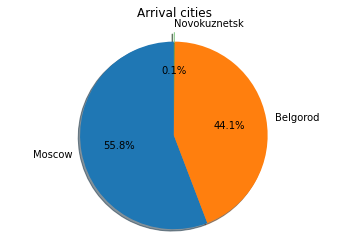

In [390]:
dff = df['arrival_city'].value_counts()
label = dff.index
size = dff.values

explode = (0, 0, 0.1)  # only "explode" the 3rd slice 

fig1, ax1 = plt.subplots()
ax1.pie(size, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set(title="Arrival cities")
plt.show()

In [391]:
print("% of flights to Novokuznetsk:", len(df[df.arrival_city == 'Novokuznetsk'].index) / len(df.index) * 100)
df_n = df[df.arrival_city == 'Novokuznetsk']

# Данные по Новокузнецку лимитированы. Запомним то, что полётов было мало, а средняя задержка была:
mean_nk_delay = df_n.delay_in_minutes.mean()
msk_delay_mean = df[df.arrival_city == "Moscow"].delay_in_minutes.mean()
b_delay_mean = df[df.arrival_city == "Belgorod"].delay_in_minutes.mean()
print("Задержка в Новокузнецк в среднем:", mean_nk_delay, "минуты")
df = df.dropna()

% of flights to Novokuznetsk: 0.10498075352851977
Задержка в Новокузнецк в среднем: 3.111111111111111 минуты


In [392]:
df.columns = ['id','no', 'city','month','day','duration','delay','ref','amount','aircraft','seats','load','%loaded']
df = df.drop(columns=['seats','ref','load'])

In [393]:
def pos(val):
    if val < -0.05:
      color = 'red'
    elif val > 0.05:
      color = 'green'
    else:
      color = 'black'
    return 'color: %s' % color

df.corr().style.applymap(pos)

,id,duration,delay,amount,%loaded
id,1.000000,-0.897347,0.042320,-0.104386,0.375608
duration,-0.897347,1.000000,-0.044310,0.113389,-0.389201
delay,0.042320,-0.044310,1.000000,-0.010521,-0.037171
amount,-0.104386,0.113389,-0.010521,1.000000,-0.018628
%loaded,0.375608,-0.389201,-0.037171,-0.018628,1.000000


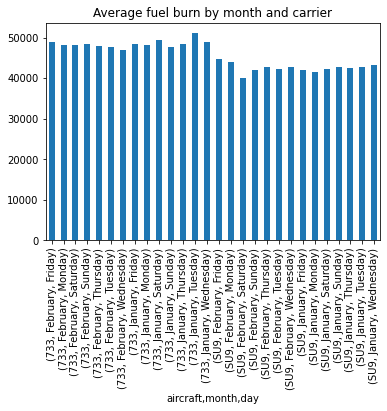

In [394]:
df.groupby(['aircraft', 'month', 'day'])['amount'].mean().plot(kind = 'bar', title='Average fuel burn by month and carrier')

In [395]:
df

,id,no,city,month,day,duration,delay,amount,aircraft,%loaded
0,136420,PG0252,Moscow,January,Sunday,98.0,4.0,48800.0,733,80.000000
2,136420,PG0252,Moscow,January,Sunday,98.0,4.0,24400.0,733,80.000000
4,136458,PG0252,Moscow,January,Monday,99.0,2.0,24400.0,733,84.615385
6,136119,PG0252,Moscow,January,Tuesday,101.0,3.0,12200.0,733,86.923077
7,136119,PG0252,Moscow,January,Tuesday,101.0,3.0,12200.0,733,86.923077
...,...,...,...,...,...,...,...,...,...,...
11989,136351,PG0252,Moscow,February,Sunday,100.0,8.0,146300.0,733,80.769231
11991,136266,PG0252,Moscow,February,Monday,100.0,3.0,49200.0,733,83.076923
11992,136266,PG0252,Moscow,February,Monday,100.0,3.0,48000.0,733,83.076923
11993,136215,PG0252,Moscow,February,Tuesday,100.0,4.0,49100.0,733,87.692308


In [396]:
df.groupby(by='id').amount.sum()
df['amount'] = df.groupby(by=['id']).amount.transform('sum')
df.drop_duplicates(inplace=True)

In [397]:
df

,id,no,city,month,day,duration,delay,amount,aircraft,%loaded
0,136420,PG0252,Moscow,January,Sunday,98.0,4.0,3581300.0,733,80.000000
4,136458,PG0252,Moscow,January,Monday,99.0,2.0,3812100.0,733,84.615385
6,136119,PG0252,Moscow,January,Tuesday,101.0,3.0,3869500.0,733,86.923077
10,136159,PG0252,Moscow,January,Wednesday,98.0,2.0,4292600.0,733,88.461538
13,136202,PG0252,Moscow,January,Thursday,102.0,2.0,3324600.0,733,76.923077
...,...,...,...,...,...,...,...,...,...,...
349,136780,PG0480,Belgorod,February,Friday,50.0,5.0,2820000.0,SU9,91.752577
351,136630,PG0480,Belgorod,February,Saturday,50.0,7.0,2927900.0,SU9,96.907216
354,136802,PG0480,Belgorod,February,Sunday,50.0,7.0,2854200.0,SU9,98.969072
357,136953,PG0480,Belgorod,February,Monday,50.0,2.0,2921900.0,SU9,100.000000


In [398]:
df.loc[df['aircraft'] == '733', 'fuel_burnt'] = df['%loaded']/100 * am_max_burn
df.loc[df['aircraft'] == 'SU9', 'fuel_burnt'] = df['%loaded']/100 * ab_max_burn
df['spent_on_fuel'] = df.fuel_burnt * fuel_cost
df['profit'] = df['amount'] - df.spent_on_fuel


In [399]:
df

,id,no,city,month,day,duration,delay,amount,aircraft,%loaded,fuel_burnt,spent_on_fuel,profit
0,136420,PG0252,Moscow,January,Sunday,98.0,4.0,3581300.0,733,80.000000,4390.048,1681.607886,3.579618e+06
4,136458,PG0252,Moscow,January,Monday,99.0,2.0,3812100.0,733,84.615385,4643.320,1778.623726,3.810321e+06
6,136119,PG0252,Moscow,January,Tuesday,101.0,3.0,3869500.0,733,86.923077,4769.956,1827.131646,3.867673e+06
10,136159,PG0252,Moscow,January,Wednesday,98.0,2.0,4292600.0,733,88.461538,4854.380,1859.470259,4.290741e+06
13,136202,PG0252,Moscow,January,Thursday,102.0,2.0,3324600.0,733,76.923077,4221.200,1616.930660,3.322983e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,136780,PG0480,Belgorod,February,Friday,50.0,5.0,2820000.0,SU9,91.752577,2012.913,771.046325,2.819229e+06
351,136630,PG0480,Belgorod,February,Saturday,50.0,7.0,2927900.0,SU9,96.907216,2125.998,814.363534,2.927086e+06
354,136802,PG0480,Belgorod,February,Sunday,50.0,7.0,2854200.0,SU9,98.969072,2171.232,831.690418,2.853368e+06
357,136953,PG0480,Belgorod,February,Monday,50.0,2.0,2921900.0,SU9,100.000000,2193.849,840.353859,2.921060e+06


In [403]:

print("Можно заметить что чем меньше задержка и чем дольше полет - тем больше выгоды")
df.corr().style.applymap(pos)

Можно заметить что чем меньше задержка и чедольше полет - тем больше выгоды


,id,duration,delay,amount,%loaded,fuel_burnt,spent_on_fuel,profit
id,1.000000,-0.899255,0.041483,-0.794822,0.353648,-0.871178,-0.871178,-0.794738
duration,-0.899255,1.000000,-0.044102,0.895230,-0.368407,0.976074,0.976074,0.895139
delay,0.041483,-0.044102,1.000000,-0.058544,-0.024519,-0.056123,-0.056123,-0.058544
amount,-0.794822,0.895230,-0.058544,1.000000,0.048221,0.962896,0.962896,1.000000
%loaded,0.353648,-0.368407,-0.024519,0.048221,1.000000,-0.181129,-0.181129,0.048402
fuel_burnt,-0.871178,0.976074,-0.056123,0.962896,-0.181129,1.000000,1.000000,0.962838
spent_on_fuel,-0.871178,0.976074,-0.056123,0.962896,-0.181129,1.000000,1.000000,0.962838
profit,-0.794738,0.895139,-0.058544,1.000000,0.048402,0.962838,0.962838,1.000000


3325675.3209632915


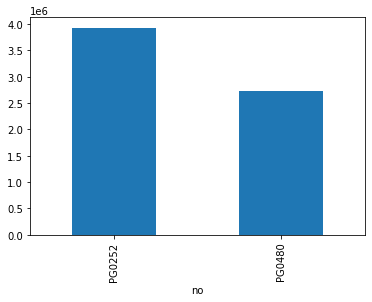

In [414]:
print(df.profit.mean())
df.groupby(by=['no']).profit.mean().plot(kind='bar')

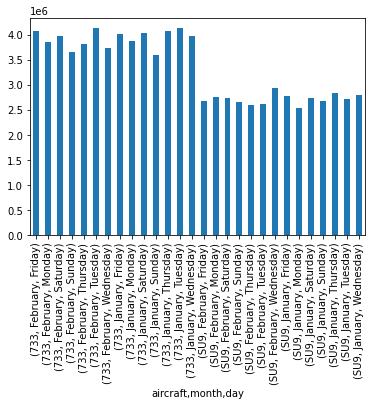

In [408]:
df.groupby(by=['aircraft','month','day']).profit.mean().plot(kind='bar')

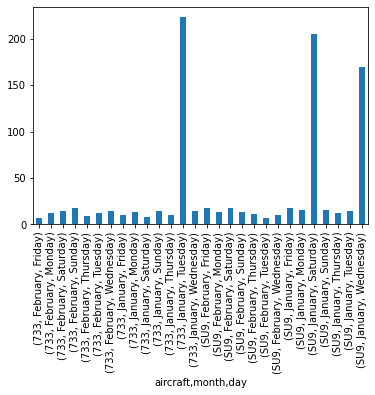

In [412]:
df.groupby(by=['aircraft','month','day']).delay.sum().plot(kind='bar')